In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
file_url= ('https://github.com/vappiah/Machine-Learning-Tutorials/raw/refs/heads/main/datasets/cancer_gene_expression.zip')
df=pd.read_csv(file_url)

In [105]:
#let's check the number of samples and features
#note:the last column contain the labels. it is not considered as a feature

print(df.shape)

(801, 8001)


In [107]:
#let's check some of the columns (first, second and third columns)
print(df.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [109]:
#lets check the name of the last column of this dataframe

df.columns[-1]#lets check the name of the last column of this dataframe

'Cancer_Type'

In [112]:
#check for missing values
datanul=df.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [114]:
#let's check how many different cancer types are there in the data
#note: in this tutorial the cancer types will be referred to as classes or labels

print(df['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


<Axes: xlabel='Cancer_Type'>

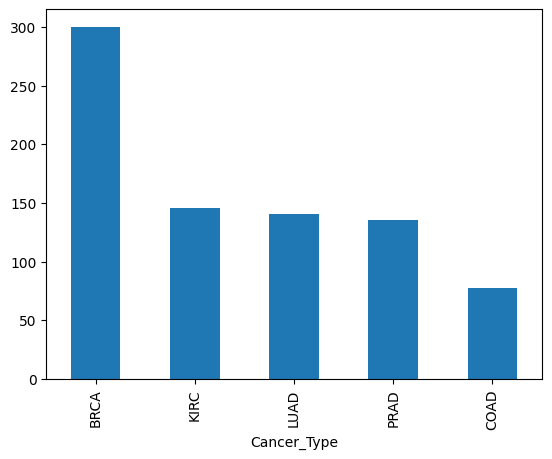

In [86]:
df['Cancer_Type'].value_counts()
df['Cancer_Type'].value_counts().plot.bar()


In [115]:
#Data preprocessing
X= df.iloc[:,0:-1]
y= df.iloc[:,-1]


In [116]:
X.shape

(801, 8000)

In [117]:
y.shape

(801,)

In [121]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [89]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [90]:
classes

array([0, 1, 2, 3, 4])

In [91]:
#80:20
#Data splitting
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [92]:
df.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,0.231049,0.010844,2.405459,0.005799,0.065640,0.022036,0.028394,0.703998,1.916364
std,0.136850,0.656692,0.153859,0.797236,0.052265,0.213557,0.148917,0.161606,0.779321,0.877010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.898595,0.000000,0.000000,0.000000,0.000000,0.000000,1.357214
50%,0.000000,0.000000,0.000000,2.358284,0.000000,0.000000,0.000000,0.000000,0.518031,1.877862
75%,0.000000,0.000000,0.000000,2.929355,0.000000,0.000000,0.000000,0.000000,1.123931,2.486792
max,1.482332,6.575004,3.778061,4.746646,0.570754,1.866275,2.169925,2.375957,4.541670,4.932231


In [119]:
# scale data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [94]:
X_train_norm

array([[-0.19414854, -0.35833342, -0.0672956 , ..., -0.8880727 ,
         1.20350353, -0.37866805],
       [-0.19414854,  1.1668198 , -0.0672956 , ...,  0.08322532,
        -0.8584863 , -1.34096852],
       [-0.19414854, -0.35833342, -0.0672956 , ..., -0.48013143,
         0.81967176,  0.63270033],
       ...,
       [-0.19414854,  0.13401623, -0.0672956 , ...,  3.26069889,
         0.13660706, -0.4860489 ],
       [-0.19414854, -0.35833342, -0.0672956 , ..., -0.53996433,
        -1.07772458, -0.33009404],
       [ 2.48123687, -0.35833342, -0.0672956 , ..., -0.25732064,
        -0.1388365 , -0.03123647]])

In [95]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier


In [122]:
#feature selection
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X_train_norm,y_train)

In [97]:
#select top n features. lets say 300.
#you can modify the value and see how the performance of the model changes

n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [98]:
#Classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
# Select the features from X_train_norm and X_test_norm based on selected_scores_indices
X_train_selected = X_train_norm[:, selected_scores_indices]
X_test_selected = X_test_norm[:, selected_scores_indices]
RF.fit(X_train_selected,y_train)
y_pred = RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)

In [124]:
# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [125]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9583
precision:0.9756
recall:0.9752
f1score:0.9748


classification report


              precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      0.88      0.93        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.92      0.92      0.92        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.96      0.97       161
weighted avg       0.98      0.98      0.97       161



In [126]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

Text(50.722222222222214, 0.5, 'True Labels')

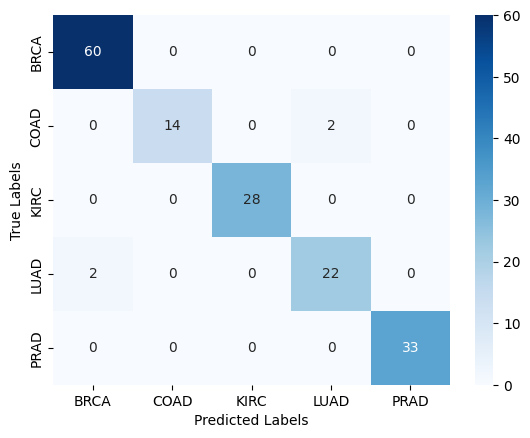

In [128]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [127]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,60,0,0,0,0
COAD,0,14,0,2,0
KIRC,0,0,28,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


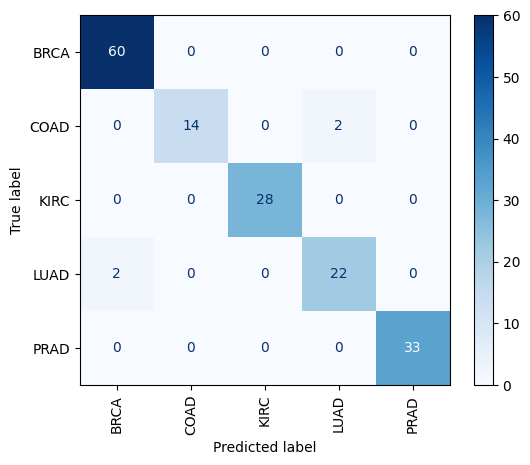

In [131]:
#visualize the confusion matrix directly
disp=ConfusionMatrixDisplay.from_estimator(RF, X_test_selected, y_test,
                                        display_labels=labels,
                                        cmap='Blues',
                                        xticks_rotation='vertical')

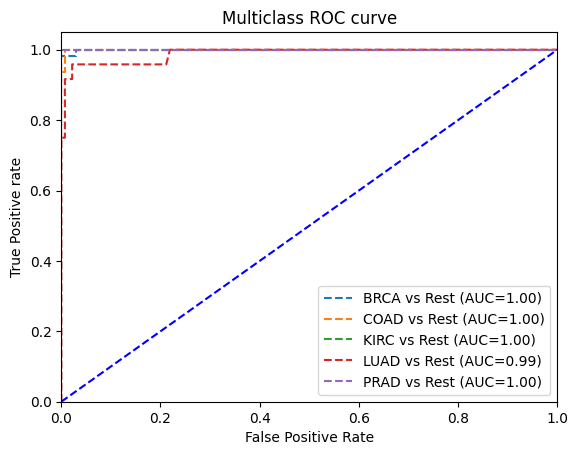

In [132]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()